### Sample program for Ada Boost Classifier  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [2]:
csv_in = 'ai-end1-5.csv'

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1001, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   classes          1001 non-null   object
 1   gill_color       1001 non-null   object
 2   gill_attachment  1001 non-null   object
 3   odor             1001 non-null   object
 4   cap_color        1001 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB
None


,classes,gill_color,gill_attachment,odor,cap_color
0,e,w,f,f,n
1,p,b,f,f,e
2,e,e,f,t,b
3,p,w,f,t,b
4,p,h,f,f,y


In [4]:
X= df[['gill_color', 'gill_attachment', 'odor', 'cap_color']]
X = pd.get_dummies(X, drop_first=True)
y = df['classes']

In [5]:
print(X.shape)
print(X.info())
display(X.head())
print(y.shape)
print(y.head())

(1001, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gill_color_e       1001 non-null   uint8
 1   gill_color_g       1001 non-null   uint8
 2   gill_color_h       1001 non-null   uint8
 3   gill_color_k       1001 non-null   uint8
 4   gill_color_n       1001 non-null   uint8
 5   gill_color_o       1001 non-null   uint8
 6   gill_color_p       1001 non-null   uint8
 7   gill_color_r       1001 non-null   uint8
 8   gill_color_u       1001 non-null   uint8
 9   gill_color_w       1001 non-null   uint8
 10  gill_color_y       1001 non-null   uint8
 11  gill_attachment_f  1001 non-null   uint8
 12  odor_t             1001 non-null   uint8
 13  cap_color_c        1001 non-null   uint8
 14  cap_color_e        1001 non-null   uint8
 15  cap_color_g        1001 non-null   uint8
 16  cap_color_n        1001 non-null   uint8
 17  cap

,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,...,odor_t,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


(1001,)
0    e
1    p
2    e
3    p
4    p
Name: classes, dtype: object


In [6]:
abc=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=7)            

# Hyperparameter settings for grid search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [2, 4],
}

In [7]:
grid_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=8)
gen_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=14)

In [8]:
gs = GridSearchCV(abc, param_grid , cv=grid_cv, scoring='accuracy')

In [9]:
%%time
nested_score = cross_val_score(gs, X=X, y=y, cv=gen_cv,
                               scoring='accuracy')
print(nested_score)
print(nested_score.mean())

[0.91633466 0.892      0.92       0.916     ]
0.9110836653386454
Wall time: 21.5 s


In [10]:
%%time
gs.fit(X, y)
gs_best = gs.best_estimator_

Wall time: 5.96 s


In [11]:
print(gs_best)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, random_state=7)


In [12]:
print(pd.Series(gs_best.feature_importances_, index=X.columns))

gill_color_e         8.803029e-03
gill_color_g         1.959688e-02
gill_color_h         9.325513e-03
gill_color_k         1.718730e-02
gill_color_n         6.041806e-02
gill_color_o         0.000000e+00
gill_color_p         7.310275e-02
gill_color_r         9.155167e-04
gill_color_u         7.555850e-03
gill_color_w         1.443949e-01
gill_color_y         2.087458e-14
gill_attachment_f    1.074877e-02
odor_t               1.704970e-01
cap_color_c          6.321879e-02
cap_color_e          1.622965e-02
cap_color_g          7.594561e-02
cap_color_n          1.090368e-01
cap_color_p          9.907317e-02
cap_color_r          6.534200e-03
cap_color_u          1.339508e-02
cap_color_w          7.924298e-02
cap_color_y          1.477812e-02
dtype: float64


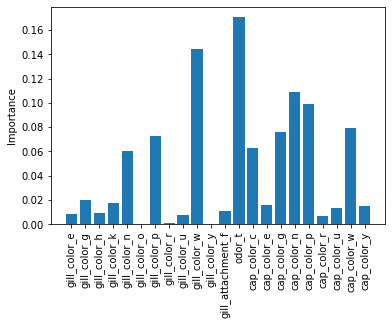

In [13]:
plt.bar(X.columns, gs_best.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()